In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/home/code_wizard/coding_files/machine_learning_1/Assignment_dataset.csv')
data=pd.DataFrame(data)
data.columns
data.head()

,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
0,2,1,2824.802093,2530.517100,2717.842544,4
1,1,1,908.538051,1371.403348,1480.603380,2
2,1,0,4264.296027,4085.271732,4433.111426,4
3,2,1,650.809883,1537.163058,1002.764724,0
4,2,1,743.972385,1580.194147,992.426731,0


In [4]:
categorical_features=[]
continuous_features=[]
for feature in data.columns:
    if data[feature].dtype=='int32' or data[feature].dtype=='int4':
        categorical_features.append(feature)
    else:
        continuous_features.append(feature)

print(continuous_features)
print(categorical_features)  

for feature in data.columns:
    if feature in continuous_features:
        data[feature]=(data[feature]-data[feature].min())/(data[feature].max()-data[feature].min())
        
data

['Categorical_1', 'Categorical_2', 'Feature_1', 'Feature_2', 'Feature_3', 'Label']
[]


,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
0,1.0,1.0,0.635922,0.598592,0.569223,1.00
1,0.5,1.0,0.193404,0.318476,0.282663,0.50
2,0.5,0.0,0.968341,0.974320,0.966501,1.00
3,1.0,1.0,0.133888,0.358534,0.171990,0.00
4,1.0,1.0,0.155401,0.368933,0.169595,0.00
...,...,...,...,...,...,...
4995,0.5,0.0,0.402636,0.298745,0.384628,0.25
4996,0.0,1.0,0.630694,0.583502,0.562399,1.00
4997,0.5,1.0,0.074309,0.156388,0.148846,0.75
4998,0.5,1.0,0.568773,0.487514,0.556259,0.25


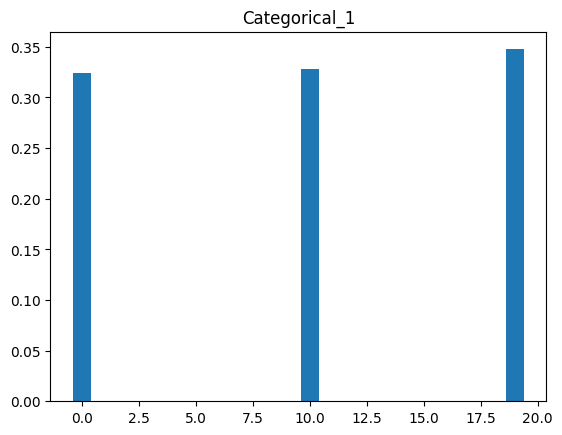

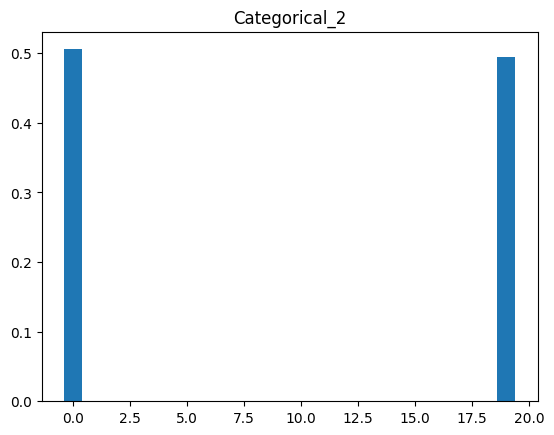

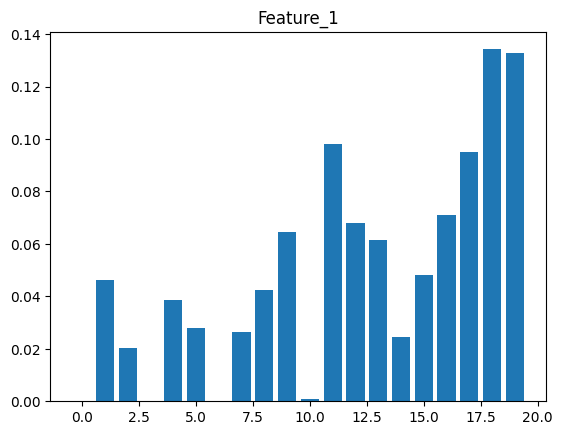

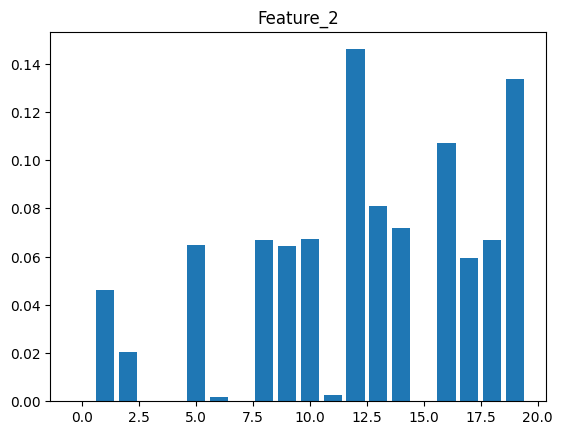

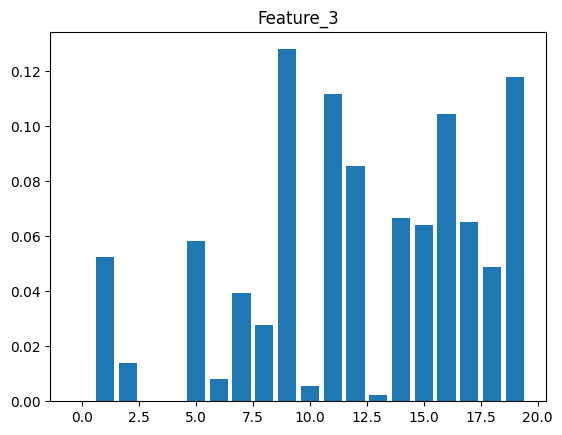

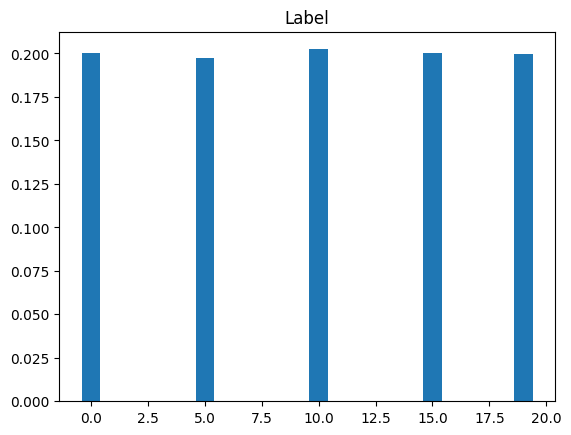

In [23]:
def bins_counts(feature):
    bins=np.linspace(data[feature].max(),data[feature].min(),20)
    bins,counts = np.unique(np.digitize(data[feature],bins),return_counts=True)
    return bins,counts/sum(counts)

for feature in continuous_features:
    bins,counts=bins_counts(feature)
    
    plt.bar(bins,counts)
    plt.title(feature)
    plt.show()


In [6]:
def K(x):
    const = 1/np.sqrt(2*np.pi)
    term = const*np.exp(-((x**2)/2))
    return const*term


In [7]:
def get_gaussian_likelihood(x, mean, var):
    eps = 1e-6  
    coeff = 1.0 / np.sqrt(2 * np.pi * var + eps)
    exponent = np.exp(-((x - mean) ** 2) / (2 * var + eps))
    return coeff * exponent


In [8]:
def KDE_likelihood(x,feature,bandwidth = 0.04):
    s=0
    for i in range(len(data)):
        s=s+get_gaussian_likelihood(x,data[feature][i],bandwidth)
    likelihood=s/len(data)
    return likelihood

grid = np.linspace(data[feature].max(),data[feature].min(),600)







In [9]:
def visualise_kde_vs_gaussian(feature):
    
    grid = np.linspace(data[feature].max(),data[feature].min(),600)
    kde_likelihood_feature=[]
    for i in range(len(grid)):

        kde_likelihood=KDE_likelihood(grid[i],feature)
        kde_likelihood_feature.append(kde_likelihood)

    gaussian_likelihood_feature=[]
    for i in range(len(grid)):

        gaussian_likelihood = get_gaussian_likelihood(grid[i],data[feature].mean(),data[feature].std())
        gaussian_likelihood_feature.append(gaussian_likelihood)
    return kde_likelihood_feature,gaussian_likelihood_feature



In [10]:
'''for feature in data.columns:
    kde_likelihood,gaussian_likelihood = visualise_kde_vs_gaussian(feature)
    
    plt.plot(gaussian_likelihood)
    plt.plot(kde_likelihood)
    plt.legend()
    plt.title(feature)
    plt.show()'''

'for feature in data.columns:\n    kde_likelihood,gaussian_likelihood = visualise_kde_vs_gaussian(feature)\n    \n    plt.plot(gaussian_likelihood)\n    plt.plot(kde_likelihood)\n    plt.legend()\n    plt.title(feature)\n    plt.show()'

In [11]:
feature1 = data.columns[0]
feature1

'Categorical_1'

In [12]:
'''def get_kde_class_wise(x,feature,class_label,bandwidth=0.04):
    s=0
    data_new=data[feature][data['Label']==class_label]
    for i in range(len(data_new)):
        s=s+get_gaussian_likelihood(x,list(data_new)[i],bandwidth)
        likelihood=s/len(data_new)
    return likelihood

for feature in continuous_features:

    grid = np.linspace(data[feature].max(),data[feature].min(),600)

    kde_class_0=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,0)
        kde_class_0.append(kde)

    kde_class_1=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,1)
        kde_class_1.append(kde)


    kde_class_025=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,0.25)
        kde_class_025.append(kde)


    kde_class_075=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,0.75)
        kde_class_075.append(kde)

    kde_class_05=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,0.5)
        kde_class_05.append(kde)

    plt.plot(grid,kde_class_0, label='class 0 KDE likelihoods')
    plt.plot(grid,kde_class_05, label='class 0.5 KDE likelihoods')
    plt.plot(grid,kde_class_025, label='class 0.25 KDE likelihoods')
    plt.plot(grid,kde_class_075, label='class 0.75 KDE likelihoods')
    plt.plot(grid,kde_class_1, label='class 1 KDE likelihoods')
    plt.xlabel('feature values')
    plt.ylabel('estimated likelihood')
    plt.title(feature)
    plt.legend()
    plt.show()'''









        




        




"def get_kde_class_wise(x,feature,class_label,bandwidth=0.04):\n    s=0\n    data_new=data[feature][data['Label']==class_label]\n    for i in range(len(data_new)):\n        s=s+get_gaussian_likelihood(x,list(data_new)[i],bandwidth)\n        likelihood=s/len(data_new)\n    return likelihood\n\nfor feature in continuous_features:\n\n    grid = np.linspace(data[feature].max(),data[feature].min(),600)\n\n    kde_class_0=[]\n    for i in range(len(grid)):\n        kde=get_kde_class_wise(grid[i],feature,0)\n        kde_class_0.append(kde)\n\n    kde_class_1=[]\n    for i in range(len(grid)):\n        kde=get_kde_class_wise(grid[i],feature,1)\n        kde_class_1.append(kde)\n\n\n    kde_class_025=[]\n    for i in range(len(grid)):\n        kde=get_kde_class_wise(grid[i],feature,0.25)\n        kde_class_025.append(kde)\n\n\n    kde_class_075=[]\n    for i in range(len(grid)):\n        kde=get_kde_class_wise(grid[i],feature,0.75)\n        kde_class_075.append(kde)\n\n    kde_class_05=[]\n    f

In [13]:
for feature in continuous_features:
    print(feature)

Categorical_1
Categorical_2
Feature_1
Feature_2
Feature_3
Label


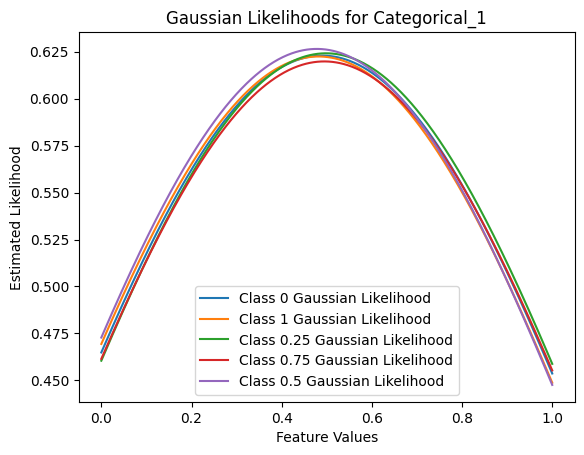

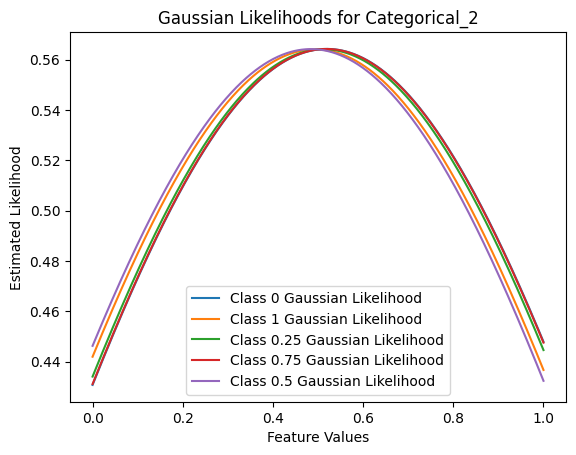

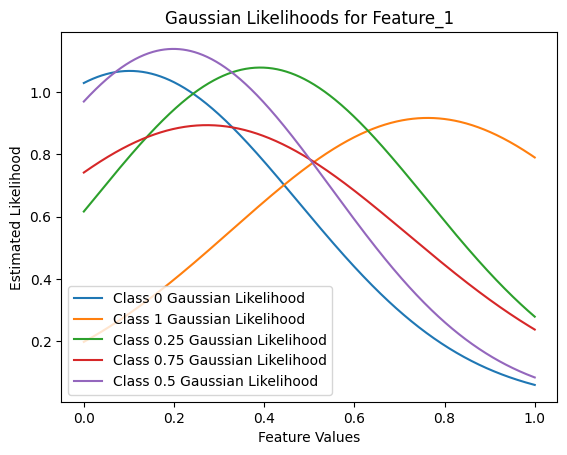

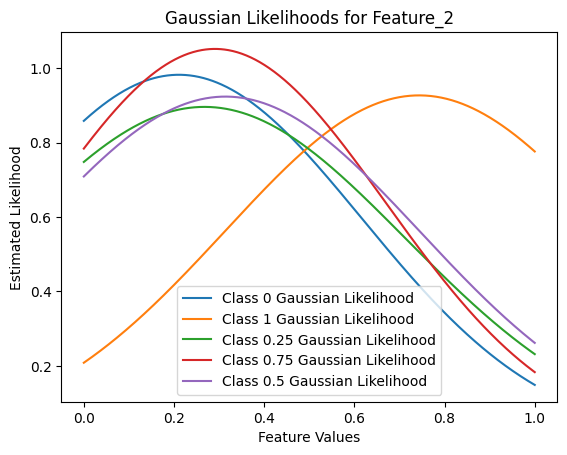

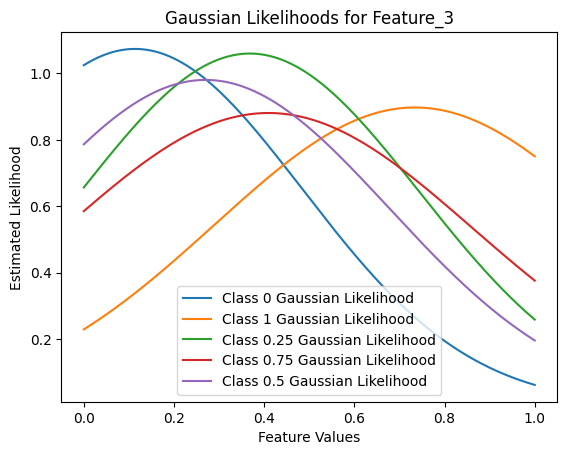

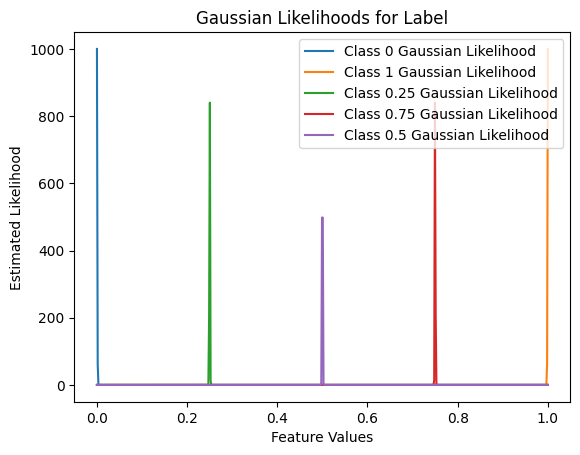

In [14]:

def get_gaussian_likelihood_class_wise(x, feature, class_label):
    data_new = data[feature][data['Label'] == class_label]
    likelihood = get_gaussian_likelihood(x, data_new.mean(), data_new.std())
    return likelihood

for feature in continuous_features:
    grid = np.linspace(data[feature].min(), data[feature].max(), 600)

    gaussian_class_0 = [get_gaussian_likelihood_class_wise(x, feature, 0) for x in grid]
    gaussian_class_1 = [get_gaussian_likelihood_class_wise(x, feature, 1) for x in grid]
    gaussian_class_025 = [get_gaussian_likelihood_class_wise(x, feature, 0.25) for x in grid]
    gaussian_class_075 = [get_gaussian_likelihood_class_wise(x, feature, 0.75) for x in grid]
    gaussian_class_05 = [get_gaussian_likelihood_class_wise(x, feature, 0.5) for x in grid]

    plt.plot(grid, gaussian_class_0, label='Class 0 Gaussian Likelihood')
    plt.plot(grid, gaussian_class_1, label='Class 1 Gaussian Likelihood')
    plt.plot(grid, gaussian_class_025, label='Class 0.25 Gaussian Likelihood')
    plt.plot(grid, gaussian_class_075, label='Class 0.75 Gaussian Likelihood')
    plt.plot(grid, gaussian_class_05, label='Class 0.5 Gaussian Likelihood')

    plt.xlabel('Feature Values')
    plt.ylabel('Estimated Likelihood')
    plt.title(f'Gaussian Likelihoods for {feature}')
    plt.legend()
    plt.show()



In [15]:
labels = np.array(data['Label'])
new_data = np.array(data.drop(columns=['Label']))

In [16]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(new_data,labels, test_size=0.10, random_state=42)


In [ ]:
def calculate_mean(x):
    return np.mean(x,axis=0)

def calculate_variance(x):
    return np.var(x,axis=0)

def prior_probablity(y):
    classes,counts=np.unique(y,return_counts=True)
    priors = {cls : count/len(y) for cls,count in zip(classes,counts)}
    return priors

def gaussian_probability(x, mean, var):
    eps = 1e-6  
    coeff = 1.0 / np.sqrt(2 * np.pi * var + eps)
    exponent = np.exp(-((x - mean) ** 2) / (2 * var + eps))
    return coeff * exponent

def train_gnb(x,y):
    classes= np.unique(y)
    summaries = {}
    for cls in classes:
        x_cls=x[y==cls]
        summaries[cls]={
            "mean":calculate_mean(x_cls),
            "var":calculate_variance(x_cls)
        }
    priors = prior_probablity(y)

    return summaries,priors

    

def calculate_posterior(X, summaries, priors):
    posteriors = []
    for x in X:
        class_probs = {}
        for cls, params in summaries.items():
            mean = params["mean"]
            var = params["var"]
            likelihood = np.prod(gaussian_probability(x, mean, var))
            posterior = priors[cls] * likelihood
            class_probs[cls] = posterior
        posteriors.append(class_probs)
    return posteriors

def predict(X,summaries,priors):
    posteriors = calculate_posterior(X,summaries,priors)
    predictions=[max(posterior,key=posterior.get) for posterior in posteriors]
    return predictions



In [18]:
summaries,priors = train_gnb(X_train_clf,y_train_clf)
summaries


{np.float64(0.0): {'mean': array([0.49032992, 0.52104664, 0.10497678, 0.21467028, 0.1166433 ]),
  'var': array([0.16799523, 0.24955704, 0.02110058, 0.02815032, 0.0204168 ])},
 np.float64(0.25): {'mean': array([0.50109769, 0.51372119, 0.39004872, 0.26527368, 0.36694766]),
  'var': array([0.16684841, 0.24981173, 0.01874426, 0.03970224, 0.02013756])},
 np.float64(0.5): {'mean': array([0.47997835, 0.49025974, 0.19908924, 0.31481711, 0.27070656]),
  'var': array([0.16220736, 0.24990513, 0.01490923, 0.03456969, 0.02709324])},
 np.float64(0.75): {'mean': array([0.49434389, 0.52262443, 0.27253779, 0.29031421, 0.41014251]),
  'var': array([0.17078249, 0.24948813, 0.03903946, 0.01996319, 0.04190992])},
 np.float64(1.0): {'mean': array([0.47949002, 0.49667406, 0.76264419, 0.74362382, 0.73356799]),
  'var': array([0.16947956, 0.24998894, 0.03515877, 0.03401759, 0.03884455])}}

In [19]:
summaries,priors = train_gnb(X_train_clf,y_train_clf)

predictions = predict(X_test_clf,summaries,priors)
predictions


[np.float64(1.0),
 np.float64(0.5),
 np.float64(0.5),
 np.float64(0.25),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.25),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.25),
 np.float64(0.75),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.75),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(0.25),
 np.float64(0.0),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.0),
 np.float64(0.25),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.25),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.25),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.75),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(0.25),
 np.float64(0.0),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0

In [20]:
accuracy = np.mean(predictions==y_test_clf)
accuracy

np.float64(0.596)

In [54]:
data = pd.DataFrame(data)
data.columns[:-1]

Index(['Categorical_1', 'Categorical_2', 'Feature_1', 'Feature_2',
       'Feature_3'],
      dtype='object')

In [55]:
training_data = data.iloc[:4500]
testing_data = data.iloc[4500:]
data['Label'].unique()

array([1.  , 0.5 , 0.  , 0.75, 0.25])

In [58]:
class_1_priors = training_data['Label'].value_counts()[1]/len(training_data)
class_05_priors= training_data['Label'].value_counts()[0.5]/len(training_data)
class_0_priors = training_data['Label'].value_counts()[0]/len(training_data)
class_025_priors = training_data['Label'].value_counts()[0.25]/len(training_data)
class_075_priors = training_data['Label'].value_counts()[0.25]/len(training_data)


In [59]:
def get_kde_likelihood_class_wise(x,data_train,label,feature,bandwidth=0.04):
    data_class = data_train[data_train['Label']==label]
    s=0
    for i in range(len(data_class)):
        s=s+get_gaussian_likelihood(x,list(data_class[feature])[i],bandwidth)
    likelihood=s/len(data_class)
    return likelihood

def kde_likelihood_featurewise(test_data,test_data_index,label,data_train):
    p=1
    for feature in data.columns[:-1]:
        l=get_kde_likelihood_class_wise(test_data.iloc[test_data_index][feature],data_train,label,feature)
        p=p*l

    return p

likelihoods_class_wise=[]
for i in range(len(testing_data)):
    class_0 = kde_likelihood_featurewise(testing_data,i,0,training_data)*class_0_priors
    class_025 = kde_likelihood_featurewise(testing_data,i,0.25,training_data)*class_025_priors
    class_05 = kde_likelihood_featurewise(testing_data,i,0.5,training_data)*class_05_priors
    class_075 = kde_likelihood_featurewise(testing_data,i,0.75,training_data)*class_075_priors
    class_1 = kde_likelihood_featurewise(testing_data,i,1,training_data)*class_1_priors
    likelihoods_class_wise.append([class_0,class_025,class_05,class_075,class_1])

likelihoods_class_wise







[[np.float64(0.5857695756681665),
  np.float64(0.19082424674876397),
  np.float64(0.3633359457613289),
  np.float64(0.2474719445492649),
  np.float64(0.00039256283134040683)],
 [np.float64(0.35444613861536867),
  np.float64(0.3128337771910897),
  np.float64(0.5283279440606061),
  np.float64(0.30582868009259917),
  np.float64(0.002673888181004485)],
 [np.float64(5.830405427402209e-06),
  np.float64(6.519640739690797e-05),
  np.float64(3.721532124051827e-06),
  np.float64(0.00010226097119621244),
  np.float64(0.20931688420590994)],
 [np.float64(0.09886385482982414),
  np.float64(0.4862190091139217),
  np.float64(0.32901930878171903),
  np.float64(0.34838840042244446),
  np.float64(0.013925184426490364)],
 [np.float64(0.6576956983975358),
  np.float64(0.1830605800661618),
  np.float64(0.38753700232322996),
  np.float64(0.2669350773346633),
  np.float64(0.0004204456503295665)],
 [np.float64(0.33297041107823655),
  np.float64(0.24519539918597524),
  np.float64(0.27300177164167544),
  np.flo